# Walmart Sales Analysis and Forecast
### Prepared by Faizan Bokhari

## Project Overview:
This project aims to analyze the sales data of one of the largest retailers globally, focusing on understanding the factors influencing revenue. We will investigate whether variables such as air temperature, fuel cost, consumer price index (CPI), seasonal discounts, and the presence of holidays impact the sales performance of this major retail chain. By leveraging machine learning, we aim to identify key factors that contribute to revenue generation and explore how these insights can be used to minimize costs and maximize economic impact.

The dataset includes information from 45 Walmart stores, including weekly sales figures, air temperature, fuel prices, CPI, and unemployment rates in their respective regions. Our analysis will provide valuable insights into the retail industry's dynamics, offering strategies to enhance business performance and optimize decision-making processes.

## Problem Framing & Big Picture :

***
### 1. Problem and Objective Overview:
The problem at hand involves analyzing sales data to gain insights and forecast future sales. The objective is to understand the factors influencing sales and develop a model that can accurately predict future sales based on historical data. This analysis and forecasting can help optimize inventory management, staffing, and marketing strategies, leading to improved business performance.
***

### 2. Problem Framing:

The problem can be framed as a predictive modeling task, where the goal is to forecast future sales based on historical sales data and other relevant features. This involves building a machine learning model that can learn patterns from the historical data and use them to make predictions for future sales. The model should be able to handle both numerical and categorical features, as well as account for any seasonality or trends in the data.
***
### 3. Machine Learning Task:

**Regression Task:**

The machine learning task involves predicting a continuous value (weekly sales) based on input features. Regression is used because we are predicting a numerical outcome.
***

### 4. Performance Metrics:
We will use metrics like Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²) to evaluate the performance of our regression models. RMSE measures the average prediction error, giving a higher weight to larger errors. MAE provides a more straightforward interpretation of the average magnitude of the errors. R² indicates the proportion of variance in the target variable explained by the model. Higher R² and lower RMSE and MAE values suggest better model performance.
***


### Data Dictionary:
The data source for this project is the Walmart Sales dataset available on Kaggle. The dataset contains information from 45 Walmart stores, including weekly sales figures, air temperature, fuel prices, CPI, and unemployment rates in their respective regions. The dataset can be accessed at the following link: 
https://www.kaggle.com/datasets/mikhail1681/walmart-sales/data

The dataset used for model building contained 6435 observations of 8 variables. The data contains the following information:

| **Features** | **Data Description** | 
|:--------:|:--------:|
|  Store  |  This column contains the store number.   |  
|  Date   | This column contains the sales week start date.   |  
|  Weekly_Sales   |  This column contains the weekly sales figures.   |  
|  Holiday_Flag   |  This column indicates the presence or absence of a holiday. In this 1 indicates a holiday and 0 indicates no holiday.   |  
|  Temperature   |  This column contains the air temperature in the region where the store is located.  |  
|  Fuel_Price   |  This column contains the fuel cost in the region where the store is located.    | 
|  CPI  |  This column contains the consumer price index for the region. |  
|  Unemployment  | This column contains the unemployment rate for the region.  |  


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data
sales = pd.read_csv('Walmart_sales.csv')

In [3]:
# Columns and the first five rows
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Number of rows and columns
sales.shape

(6435, 8)

In [5]:
 # Size and type of data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# Statistics analysis of the data
sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Here's a description of each column in the sales DataFrame:

Store: Represents the store number where the sales data was recorded. This is a variable with values ranging from 1 to 45.

Weekly_Sales: Represents the total sales for the week in each store. 

Holiday_Flag: Indicates whether the week includes a holiday (1) or not (0). This is a binary categorical variable.

Temperature: Represents the average temperature in the region of each store during the week. This is measured in Fahrenheit.

Fuel_Price: Represents the cost of fuel in the region of each store during the week.

CPI (Consumer Price Index): Represents the consumer price index in the region of each store during the week. 

Unemployment: Represents the unemployment rate in the region of each store during the week.

These columns provide important information about the sales environment, including economic factors (CPI, unemployment), weather conditions (temperature), and holiday effects (holiday_flag) that can influence sales.

In [7]:
sales.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [8]:
sales.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [9]:
# Converting date to correct format
sales['Date'] = pd.to_datetime(sales['Date'], format='%d-%m-%Y')

In [10]:
# Checking for duplicates
sales.duplicated().sum()

0

In [11]:
# Checking for null values
sales.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [12]:
# Creating a season column 
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Extracting month from 'Date' column and map it to season
sales['Season'] = sales['Date'].dt.month.map(get_season)

# Updated DataFrame
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Season
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,Winter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Winter
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,Spring


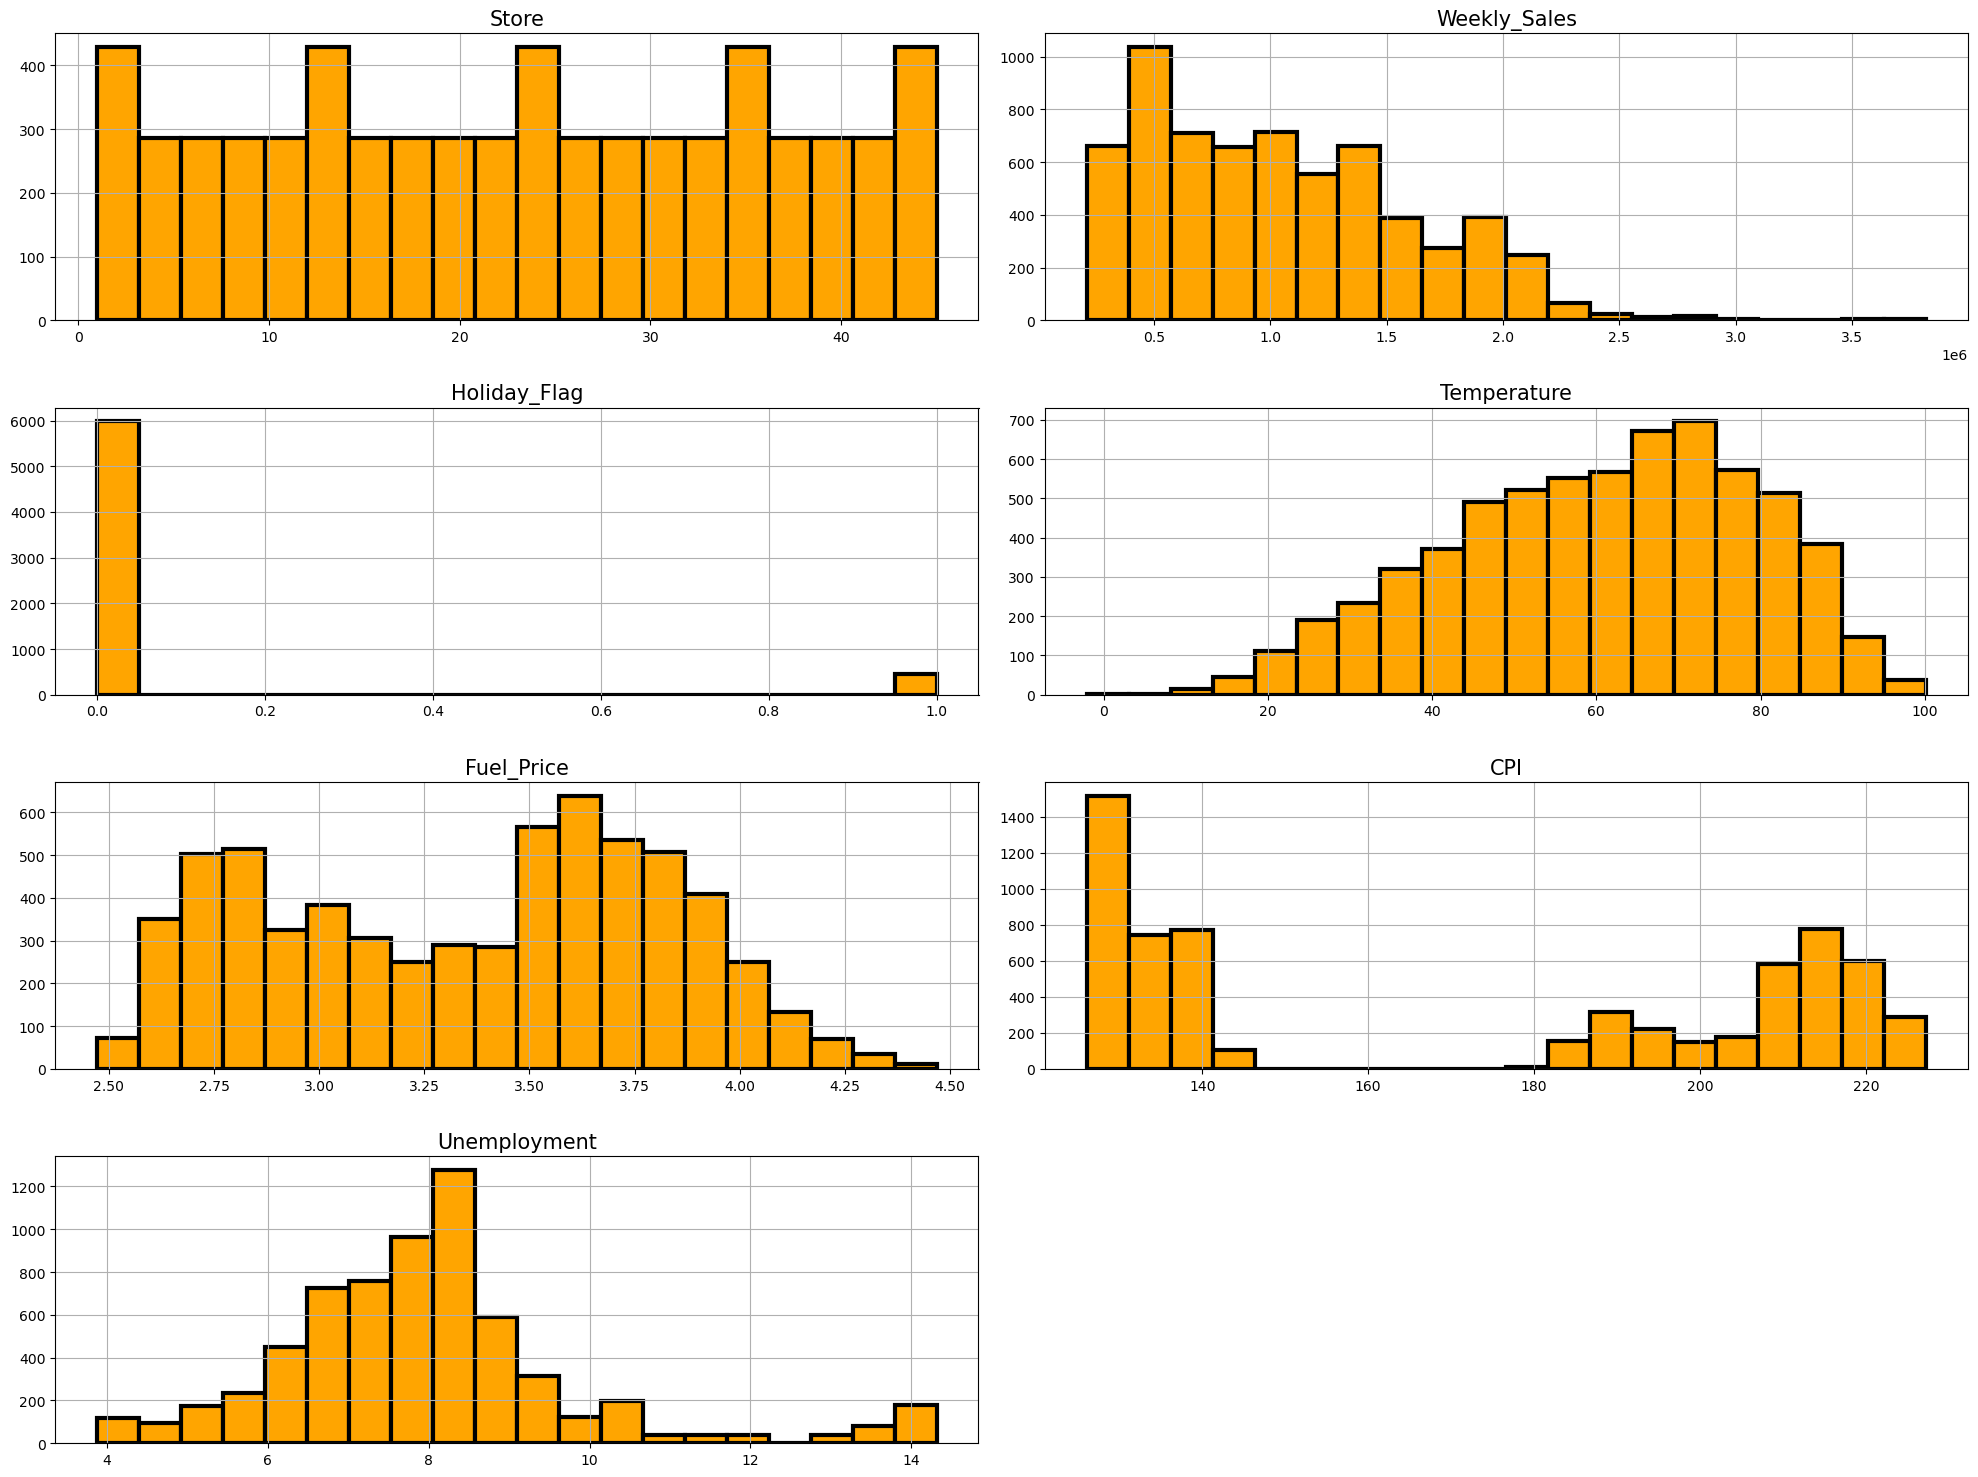

In [13]:
# Setting font size
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=15)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Numerical columns
numerical_columns = ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Plotting histograms of numerical values 
sales[numerical_columns].hist(bins=20, figsize=(20, 15), color='orange', edgecolor='black', 
                              linewidth=3, layout=(4, 2))
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Sales by Season')

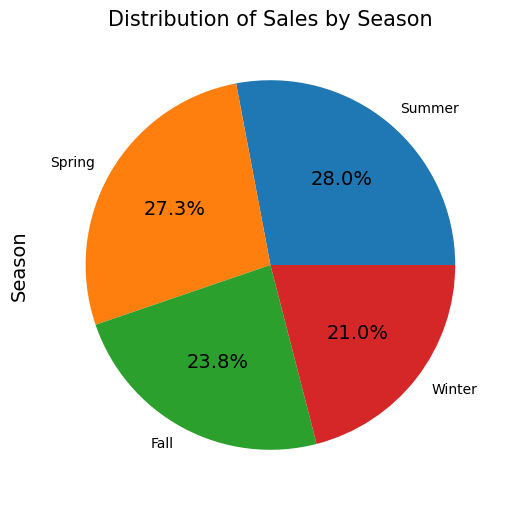

In [14]:
plt.figure(figsize=(6, 6))
sales.Season.value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Distribution of Sales by Season')

Summer: Summer appears to be the peak season for sales, with the highest number of sales recorded compared to other seasons. This could be due to factors such as summer holidays, vacations.

Spring: Spring shows a high number of sales, almost comparable to summer. This could indicate that the business experiences a significant uptick in sales as the weather warms up and people start spending more.

Fall: Fall sees a slight decrease in sales compared to spring and summer. This could be attributed to the end of the summer vacation season and the return to school and work for many people.

Winter: Winter has the lowest number of sales among the four seasons. This is likely due to factors such as colder weather, holiday expenses, and reduced outdoor activities, which can affect consumer spending habits.

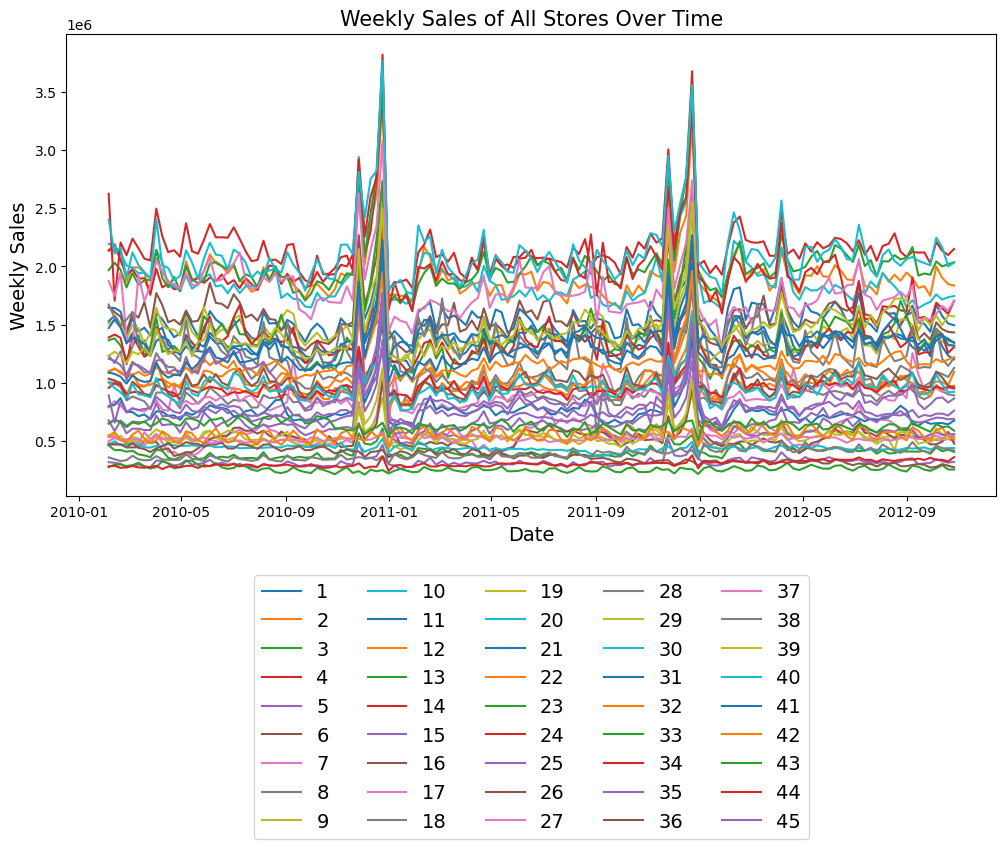

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales, x='Date', y='Weekly_Sales', hue='Store', palette='tab10')
plt.title('Weekly Sales of All Stores Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

# Move the legend to the upper center outside the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.show()

The sales figures for each store weekly can provide several insights into the performance and trends of the stores:

Seasonality: The higher sales figures for summer and spring suggest that these seasons are peak periods for sales, likely due to factors such as summer holidays, vacations, and warmer weather encouraging more outdoor activities and shopping. On the other hand, the lower sales figures for winter and fall indicate a decrease in consumer spending during colder months and the end of summer vacation season.

Store Performance: Stores with a higher proportion of sales during peak seasons (summer and spring) might be located in tourist destinations or have strong marketing campaigns during these periods. Stores with more consistent sales across seasons might have a loyal customer base or offer products/services that are in demand year-round. Differences in store performance can also be attributed to factors like location, product mix, pricing strategy, and customer service.

Outliers: Unusual spikes or drops in sales figures could be due to factors like one-time events, changes in pricing, or inventory issues. For example, a sudden increase in sales during a non-peak season could be due to a special promotion or event. In this case we can clearly see spike in sales during peak holiday season.

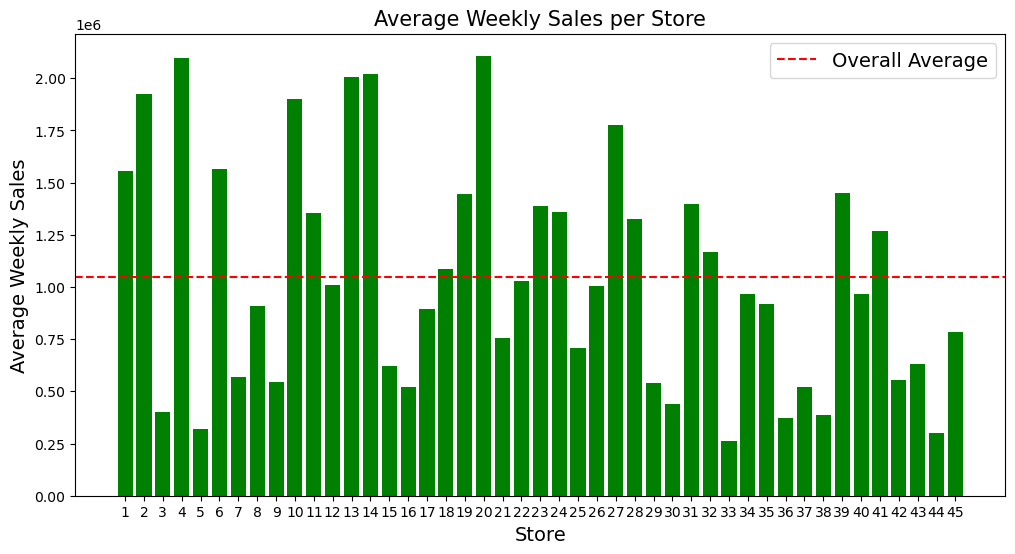

In [16]:
# Average weekly sales for each store
average_weekly_sales_per_store = sales.groupby('Store')['Weekly_Sales'].mean().reset_index()

# Orall average weekly sales
overall_average_weekly_sales = sales['Weekly_Sales'].mean()

plt.figure(figsize=(12, 6))
plt.bar(average_weekly_sales_per_store['Store'], average_weekly_sales_per_store['Weekly_Sales'], color='green')
plt.axhline(y=overall_average_weekly_sales, color='r', linestyle='--', label='Overall Average')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales per Store')
plt.xticks(average_weekly_sales_per_store['Store'])
plt.legend()
plt.show()

Sales compared to the overall average provides insights into the relative performance of each store. Here's a summary of the result:

Stores that are performing above average:

There are 19 stores categorized as "Good Performing (Sales go above the red line)."
These stores have average weekly sales higher than the overall average.
They may have strong customer bases, effective marketing strategies, or favorable locations that contribute to their higher sales.

Stores that are performing below average:

There are 26 stores categorized as "Bad Performing.(Sales stay below the red line)"
These stores have average weekly sales lower than the overall average.
They may face challenges such as weaker customer demand, less effective marketing, or less desirable locations.

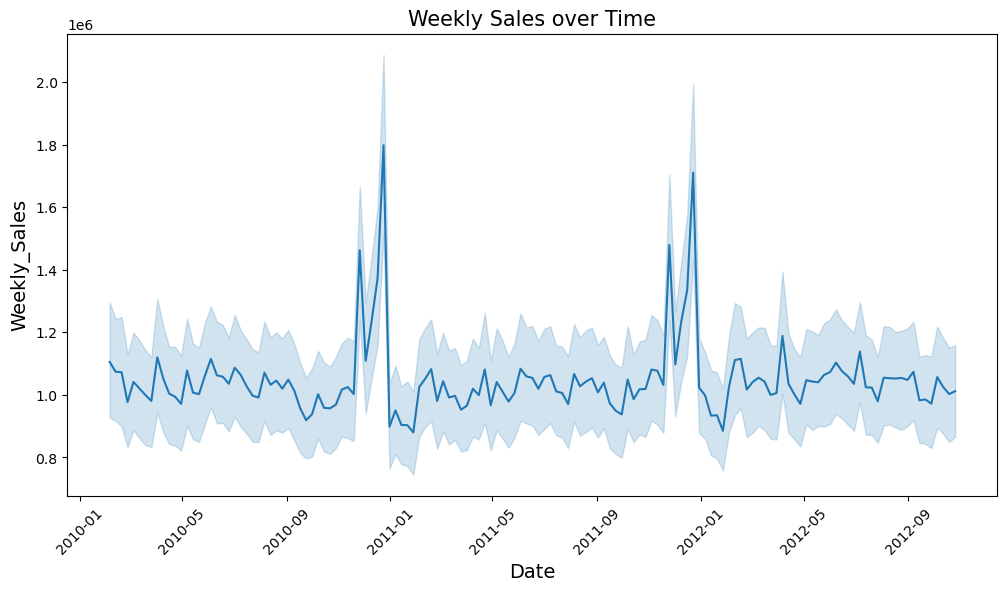

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=sales)
plt.title('Weekly Sales over Time')
plt.xticks(rotation=45)
plt.show()

The sales remain stable and consistent throughout most of the year but experience a significant spike during the holiday season. This suggests a strong and steady performance overall, with a notable increase in sales during the holiday period.

<function matplotlib.pyplot.show(close=None, block=None)>

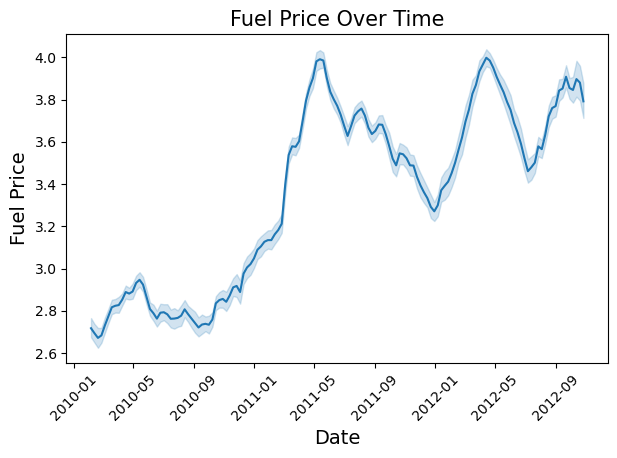

In [18]:
sns.lineplot(x='Date', y='Fuel_Price', data=sales)
plt.title('Fuel Price Over Time')
plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

The graph shows trends and fluctuations in fuel prices over the years, which can be valuable for understanding the impact of fuel price changes on various aspects of business operations, such as transportation costs, pricing strategies, and overall profitability.

Overall Trend: There is upward overall trend in the fuel prices. However, there are noticeable fluctuations over time.

Spikes: There are occasional spikes in fuel prices, such as the increase from end of 2010 to the middle of 2011, crossing the 4 dollar mark.

<function matplotlib.pyplot.show(close=None, block=None)>

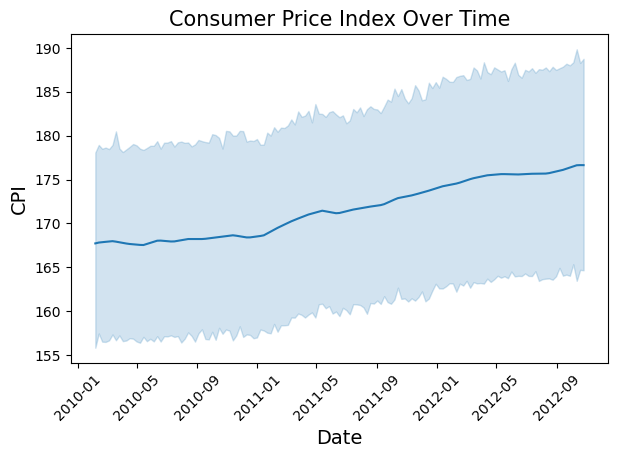

In [19]:
sns.lineplot(x='Date', y='CPI', data=sales)
plt.title('Consumer Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

The graph shows trends in CPI over the years.

Overall Trend: There is upward overall trend in CPI. 

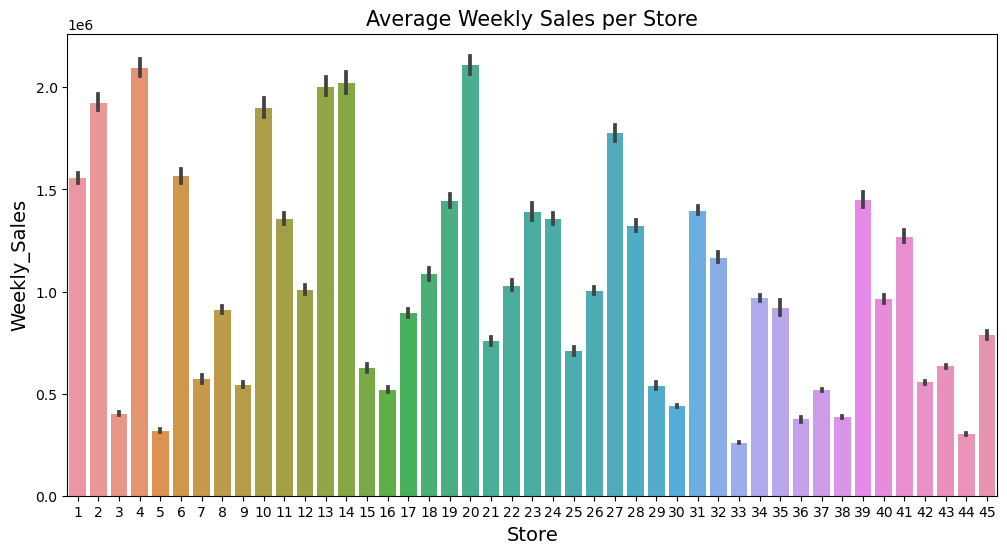

In [20]:
# Average Weekly Sales per Store
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=sales, estimator=np.mean)
plt.title('Average Weekly Sales per Store')
plt.show()

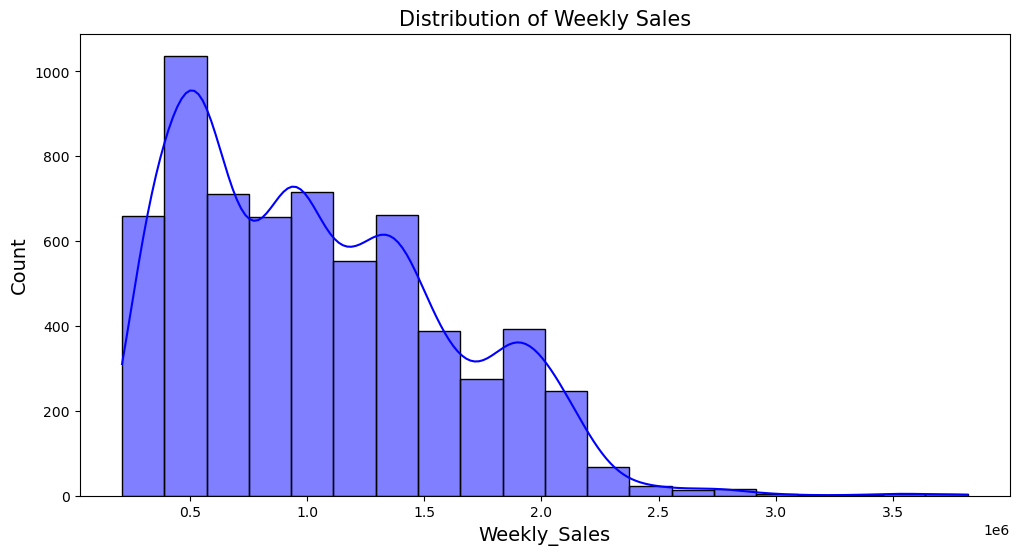

In [21]:
# Distribution of Weekly Sales
plt.figure(figsize=(12, 6))
sns.histplot(sales['Weekly_Sales'], bins=20, kde=True, color='blue')
plt.title('Distribution of Weekly Sales')
plt.show()

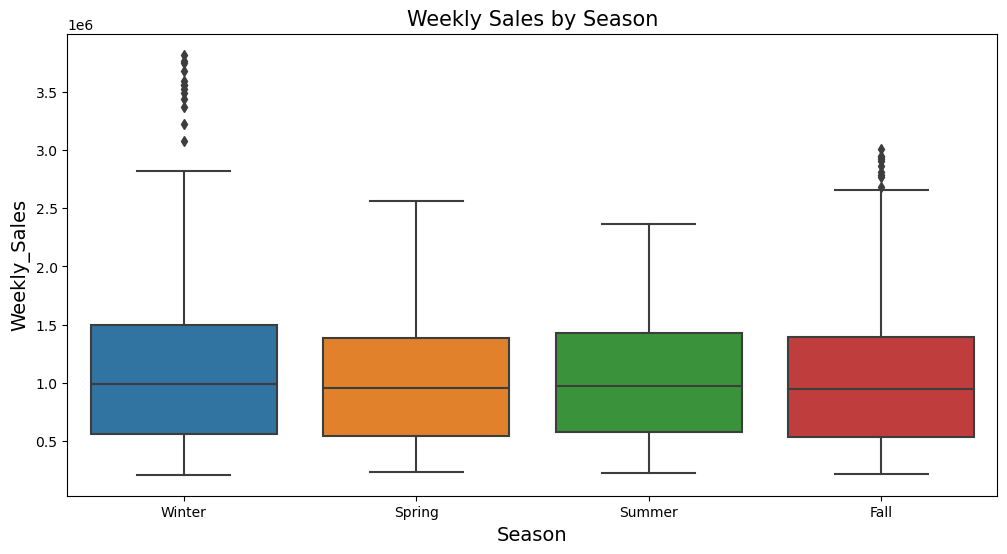

In [22]:
# Weekly Sales by Season
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Weekly_Sales', data=sales)
plt.title('Weekly Sales by Season')
plt.show()

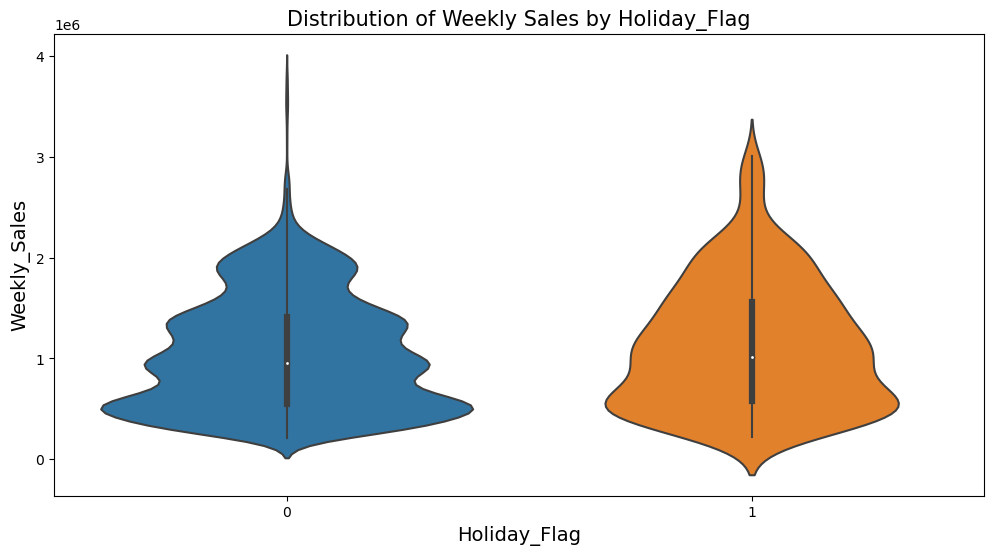

In [23]:
# Distribution of Weekly Sales by Holiday_Flag
plt.figure(figsize=(12, 6))
sns.violinplot(x='Holiday_Flag', y='Weekly_Sales', data=sales)
plt.title('Distribution of Weekly Sales by Holiday_Flag')
plt.show()

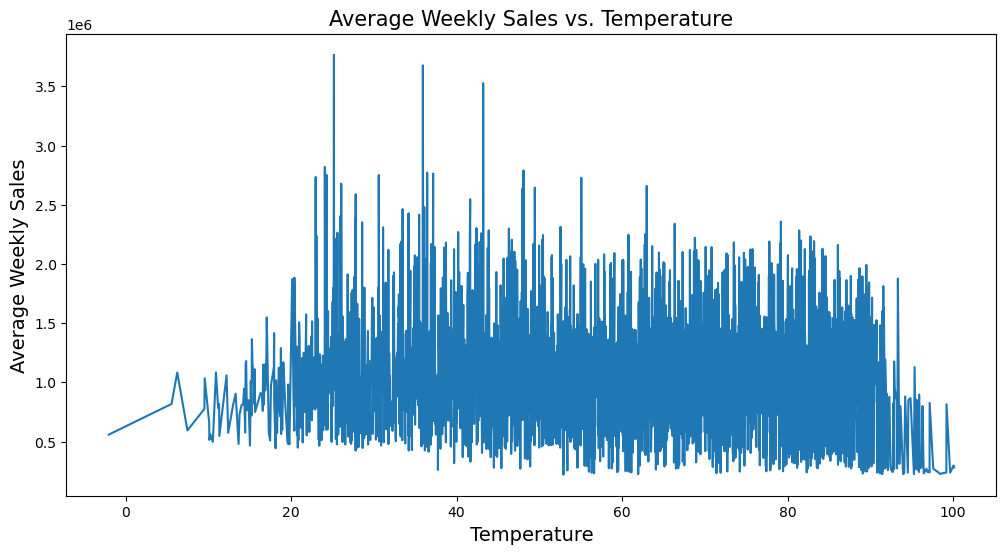

In [24]:
average_sales_by_temperature = sales.groupby('Temperature')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Temperature', y='Weekly_Sales', data=average_sales_by_temperature)
plt.title('Average Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Average Weekly Sales')
plt.show()


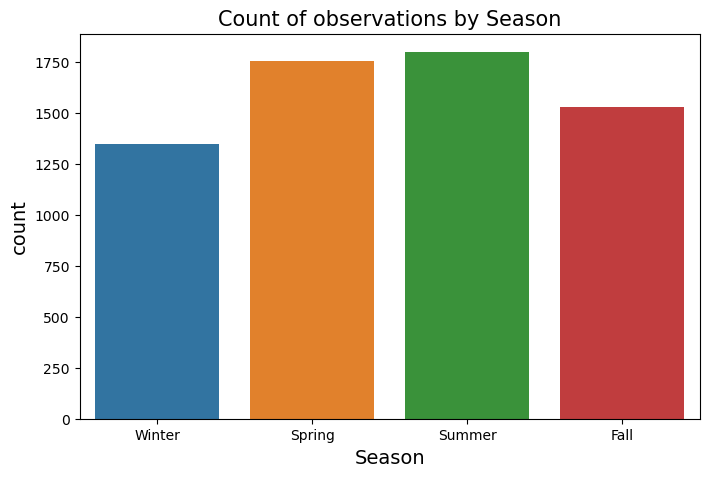

In [25]:
# Count of observations by Season
plt.figure(figsize=(8, 5))
sns.countplot(x='Season', data=sales)
plt.title('Count of observations by Season')
plt.show()

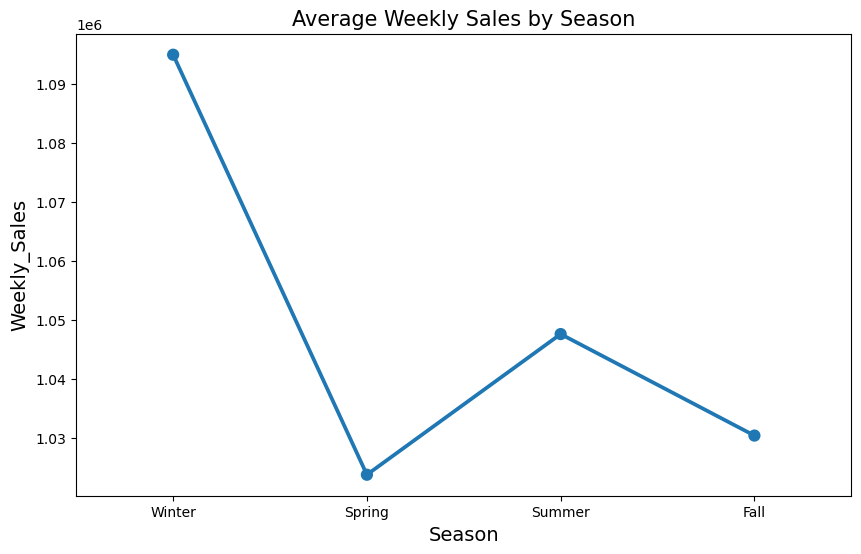

In [26]:
# Average Weekly Sales by Season
plt.figure(figsize=(10, 6))
sns.pointplot(x='Season', y='Weekly_Sales', data=sales, ci=None)
plt.title('Average Weekly Sales by Season')
plt.show()


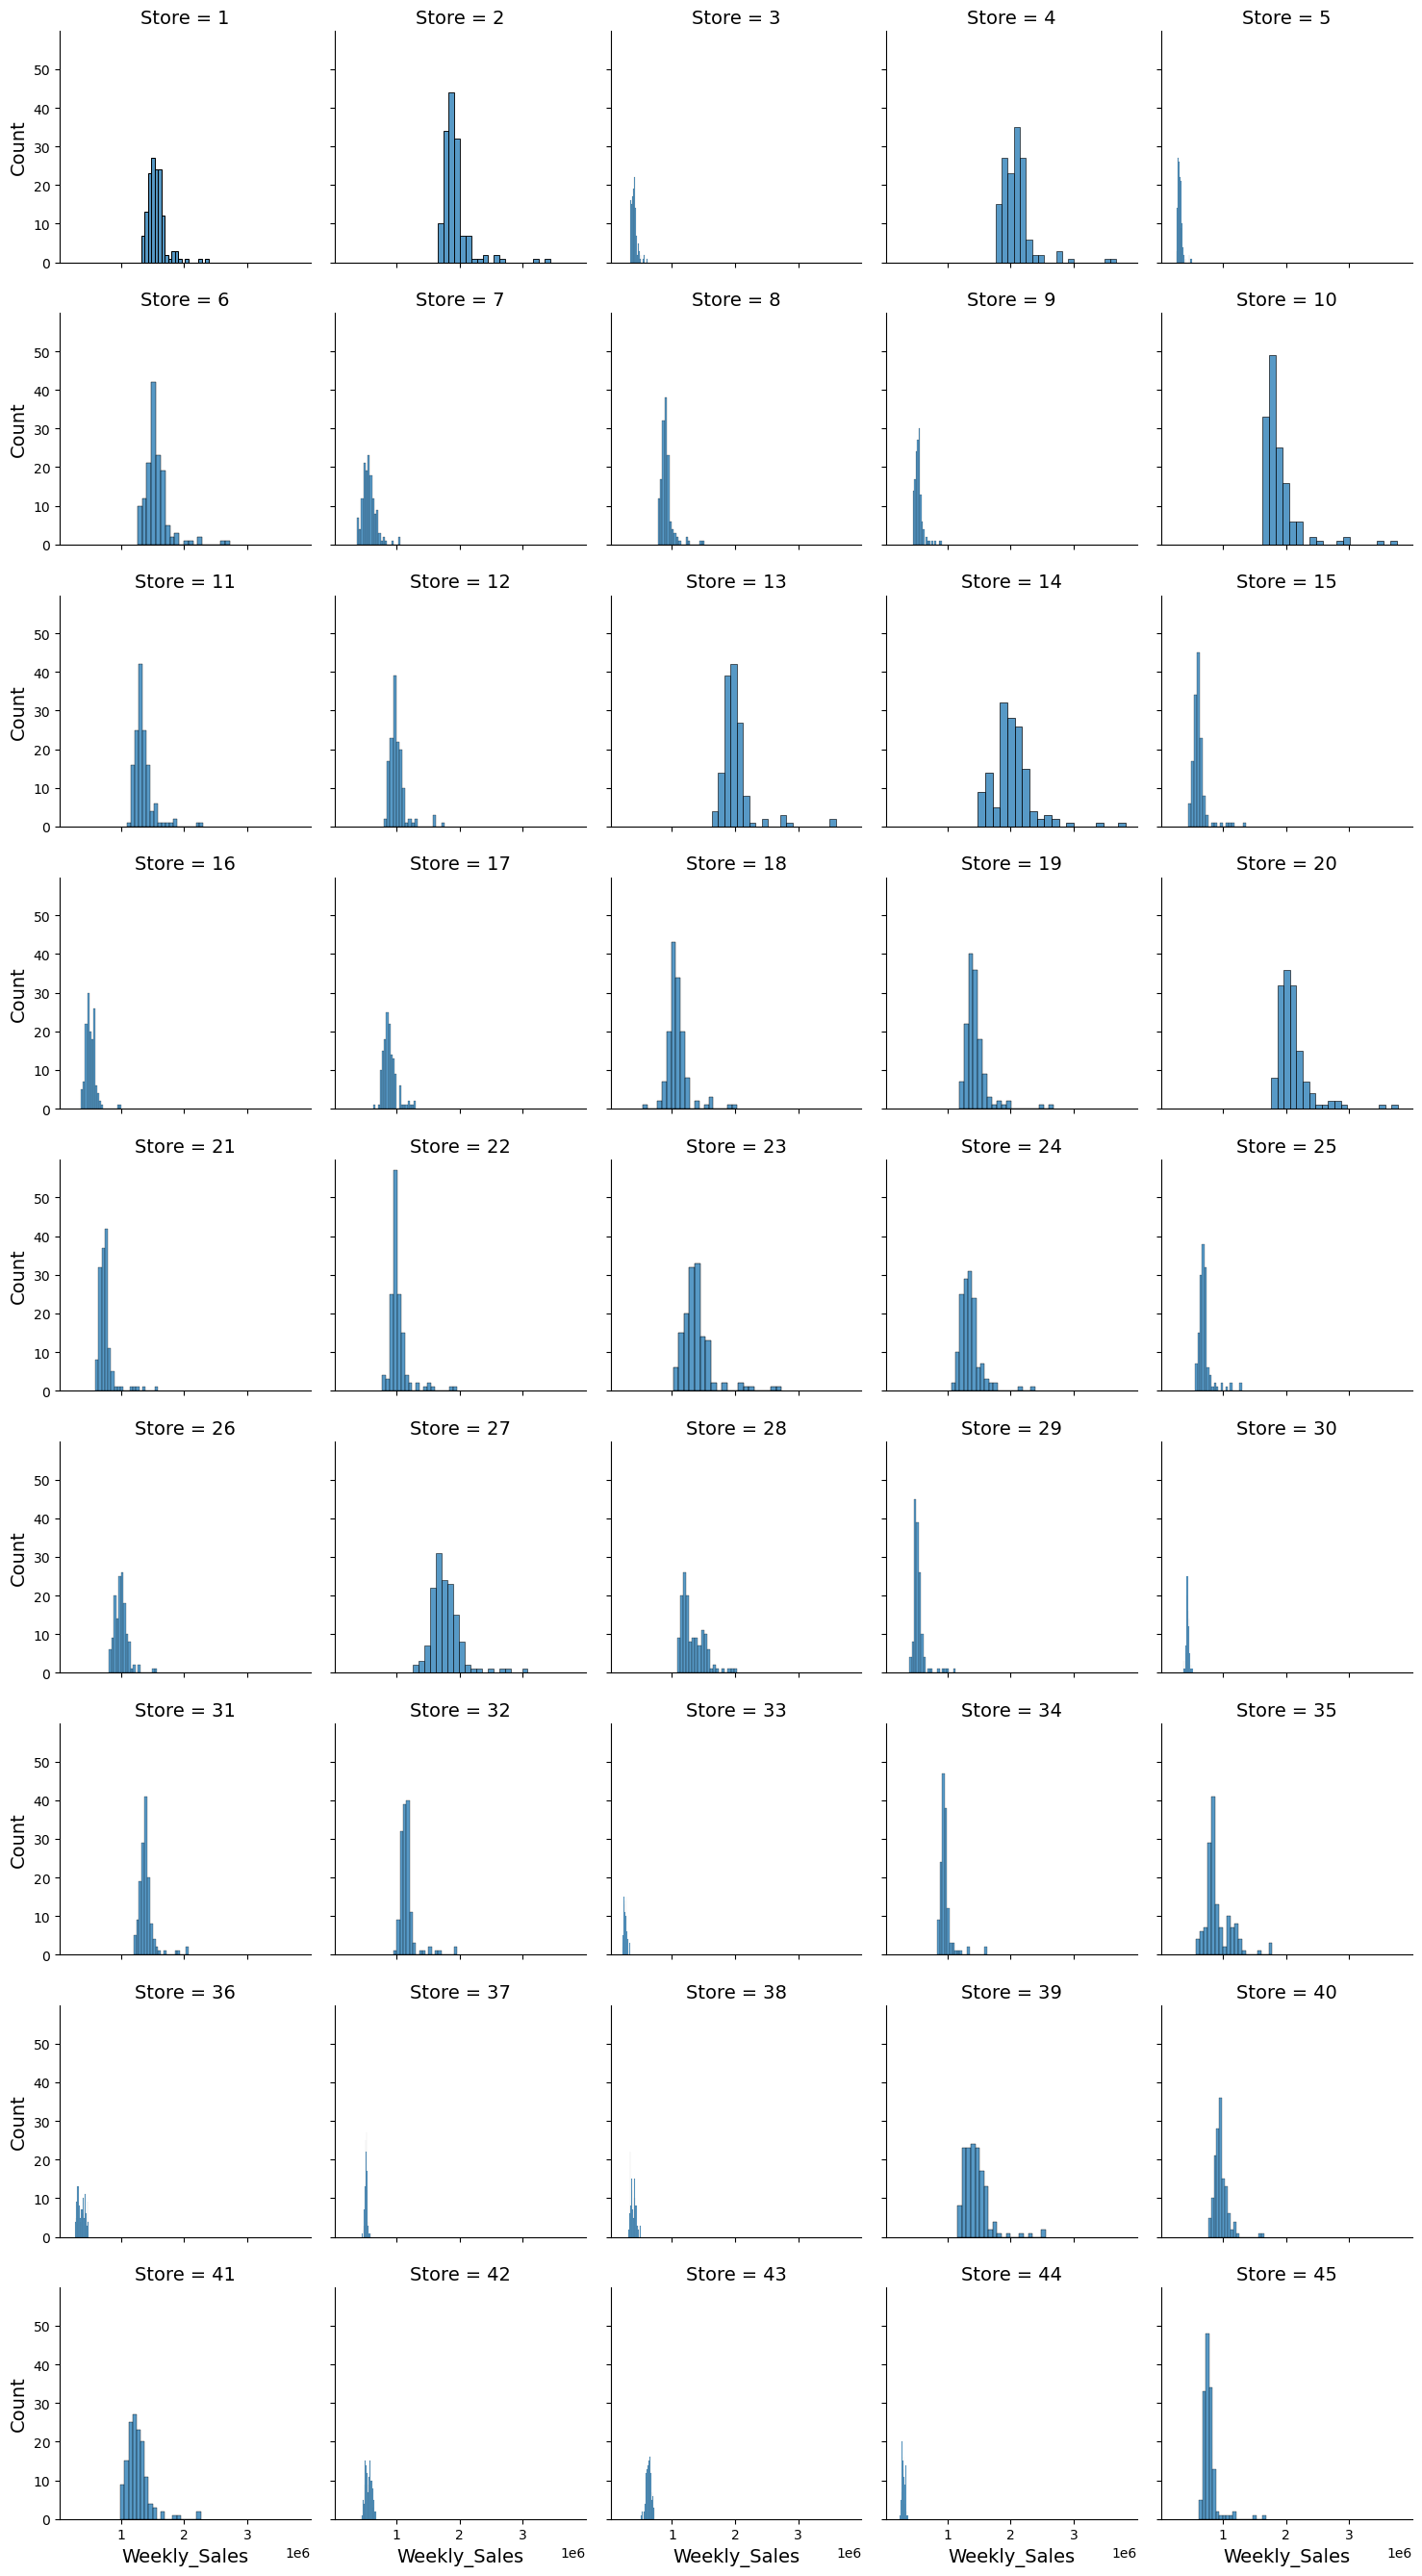

In [27]:
# Multiple plots for different store numbers
g = sns.FacetGrid(sales, col='Store', col_wrap=5)
g.map(sns.histplot, 'Weekly_Sales', bins=20)
plt.show()

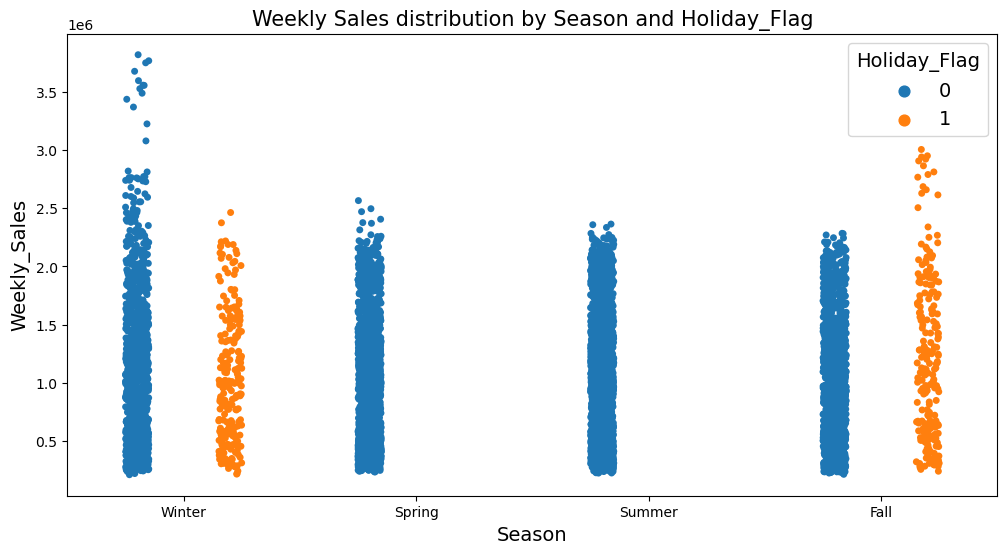

In [28]:
# Weekly Sales distribution by Season and Holiday_Flag
plt.figure(figsize=(12, 6))
sns.stripplot(x='Season', y='Weekly_Sales', hue='Holiday_Flag', data=sales, dodge=True)
plt.title('Weekly Sales distribution by Season and Holiday_Flag')
plt.show()


In [29]:
sales.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


The table shows the correlation coefficients between different columns in your dataset. Each cell in the table represents the correlation coefficient between two variables, which indicates the strength and direction of their linear relationship. Here's a breakdown of the results:

Store vs. Weekly_Sales: There is a negative correlation (-0.335) between the store number and weekly sales. This suggests that as the store number increases, the weekly sales tend to decrease slightly. However, the correlation is not very strong.

Weekly_Sales vs. Holiday_Flag: There is a very small positive correlation (0.037) between weekly sales and the holiday flag. This suggests that there might be a slight increase in sales during holidays, but the effect is not significant.

Temperature vs. Weekly_Sales: There is a small negative correlation (-0.064) between temperature and weekly sales. This suggests that as temperature increases, weekly sales tend to decrease slightly. However, the correlation is weak.

Fuel_Price vs. Weekly_Sales: There is a very small positive correlation (0.009) between fuel price and weekly sales. This suggests that there might be a slight increase in sales as fuel prices increase, but the effect is minimal.

CPI vs. Weekly_Sales: There is a small negative correlation (-0.073) between the Consumer Price Index (CPI) and weekly sales. This suggests that as the CPI increases, weekly sales tend to decrease slightly. Again, the correlation is weak.

Unemployment vs. Weekly_Sales: There is a small negative correlation (-0.106) between unemployment and weekly sales. This suggests that as the unemployment rate increases, weekly sales tend to decrease slightly. However, like the other correlations, this one is also weak.

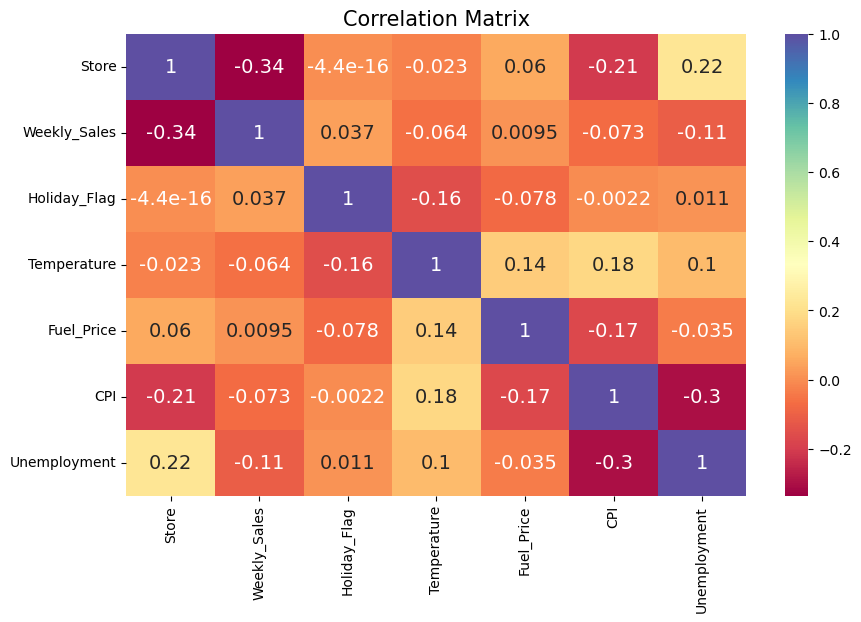

In [30]:
# Correlation matrix of numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(sales.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()

In [31]:
# Import library
from sklearn.model_selection import train_test_split

X = sales
y = sales['Weekly_Sales']

# Spliting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Season
1033,8,2010-09-17,836707.85,0,75.32,2.582,214.878556,6.315,Fall
915,7,2011-03-11,558963.83,0,20.70,3.372,192.058484,8.818,Spring
5903,42,2010-11-12,588592.61,0,61.24,3.130,126.546161,9.003,Fall
2083,15,2011-08-26,605413.17,0,69.19,3.906,136.213613,7.806,Summer
5943,42,2011-08-19,526641.23,0,87.40,3.743,129.240581,8.257,Summer
...,...,...,...,...,...,...,...,...,...
3772,27,2011-02-18,1709365.19,0,39.32,3.420,137.251185,7.827,Winter
5191,37,2010-12-03,508213.14,0,54.44,2.708,210.376263,8.476,Winter
5226,37,2011-08-05,510787.46,0,86.71,3.684,214.297294,8.177,Summer
5390,38,2011-12-30,342667.35,1,44.64,3.428,130.071032,12.890,Winter


In [33]:
X_test

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Season
2436,18,2010-03-12,1138800.32,0,42.39,2.805,131.784000,9.202,Spring
3361,24,2011-06-24,1304850.67,0,68.88,3.964,135.265267,8.212,Summer
233,2,2011-10-28,1769296.25,0,65.87,3.372,217.325182,7.441,Fall
3667,26,2011-11-11,1077640.13,0,40.08,3.570,136.461806,7.598,Fall
5011,36,2010-03-19,428851.99,0,59.56,2.701,209.980321,8.554,Spring
...,...,...,...,...,...,...,...,...,...
2600,19,2010-08-06,1492060.89,0,74.20,2.942,132.614193,8.099,Summer
6308,45,2010-05-28,801098.43,0,69.27,2.899,182.046418,8.899,Spring
6292,45,2010-02-05,890689.51,0,27.31,2.784,181.871190,8.992,Winter
151,2,2010-04-02,2066187.72,0,63.27,2.719,210.479887,8.200,Spring


In [34]:
X_train.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5148.000000,5.148000e+03,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000
mean,23.127428,1.044996e+06,0.067211,60.435437,3.363519,171.543292,7.996731
std,12.989904,5.635414e+05,0.250411,18.474075,0.456837,39.263725,1.873195
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.527781e+05,0.000000,47.250000,2.938000,131.814218,6.891000
50%,23.000000,9.590522e+05,0.000000,62.530000,3.459000,182.783277,7.874000
75%,34.000000,1.417077e+06,0.000000,74.690000,3.738000,212.377784,8.622000
max,45.000000,3.749058e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the numeric features for standard scaling
numeric_features = ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 
                    'CPI', 'Unemployment', ]

# Define the categorical features for one-hot encoding
categorical_features = ['Season']

# Preprocessing steps for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# reprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [36]:
# Transforming the data
transformed_data = preprocessor.fit_transform(sales)

# Displaying the first few rows of the transformed dataset

pd.DataFrame(transformed_data, columns=numeric_features + ['Season_1', 'Season_2', 'Season_3', 'Season_4']).head()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Season_1,Season_2,Season_3,Season_4
0,-1.693979,1.057420,-0.274204,-0.995136,-1.713800,1.004175,0.056964,0.0,0.0,0.0,1.0
1,-1.693979,1.054348,3.646917,-1.201170,-1.766089,1.007880,0.056964,0.0,0.0,0.0,1.0
2,-1.693979,1.001206,-0.274204,-1.124178,-1.840166,1.009074,0.056964,0.0,0.0,0.0,1.0
3,-1.693979,0.642828,-0.274204,-0.760907,-1.737766,1.009849,0.056964,0.0,0.0,0.0,1.0
4,-1.693979,0.899914,-0.274204,-0.767955,-1.598328,1.010624,0.056964,0.0,1.0,0.0,0.0


In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_predict

# DecisionTreeRegressor
model = DecisionTreeRegressor()

# Pipeline with the preprocessor and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# R-squared
r2 = r2_score(y_test, y_pred)
print("Final model R2:", r2)

Final model R2: 0.9999182619599781


In [38]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
print("Final model MAE:", mae)

Final model MAE: 851.058181818179


In [39]:
# RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Final model RMSE:", rmse)

Final model RMSE: 5131.499069207592


## Concluding Section

The final model achieved an impressive R-squared score of approximately 0.9999, indicating that it can explain about 99.99% of the variance in the grades. This suggests that the model is highly accurate in predicting the grades. Additionally, the model's Root Mean Squared Error (RMSE) is approximately 5058.79, which means, on average, the model's predictions are off by about 5058.79 points from the actual grades. Lower RMSE values indicate that the model is making more accurate predictions. The final model's Mean Absolute Error (MAE) is approximately 815.86. This metric indicates the average magnitude of the errors in the model's predictions. A lower MAE suggests that the model is making more accurate predictions.





### Business Impact:

The analysis and forecast project for sales data can provide valuable insights and benefits to the business:

**Optimized Inventory Management:** By forecasting future sales accurately, the stores can optimize inventory levels, reducing excess inventory costs while ensuring products are available to meet demand.

**Improved Resource Allocation:** Understanding sales trends and patterns can help in better allocation of resources, such as staffing and marketing efforts, to maximize sales opportunities.

**Enhanced Decision Making:** Data-driven insights from the analysis can assist in making informed decisions regarding product pricing, promotions, and market expansion strategies.

**Customer Satisfaction:** By ensuring product availability and optimizing operations based on sales forecasts, the business can enhance customer satisfaction and loyalty.

**Competitive Advantage:** The ability to predict sales trends and adjust strategies accordingly can provide a competitive edge in the market, enabling the business to stay ahead of competitors.

**Financial Planning:** Accurate sales forecasts can improve financial planning and budgeting processes, leading to better financial management and profitability.

Overall, the analysis and forecast project can help the business make strategic decisions that drive growth, profitability, and customer satisfaction.

### Evaluation of What Worked and What Didn't

**Successful Aspects:**

Data Preparation: The project effectively prepared the sales data, including handling missing values and encoding categorical variables, which is crucial for building accurate predictive models.

Model Selection: Using a variety of regression models allowed for a comprehensive comparison of their performance, helping to identify the best model for predicting sales.

Evaluation Metrics: The use of multiple evaluation metrics such as R-squared, MAE, and RMSE provided a holistic view of the models' performance, ensuring a thorough analysis.

Business Impact: The project's focus on understanding the business impact of the analysis and forecasting, such as optimizing inventory management and improving resource allocation, demonstrates a practical approach to data analysis.

**Areas for Improvement:**

Feature Engineering: Further exploration of feature engineering techniques could enhance the models' predictive power, such as creating new features or transforming existing ones.

Deployment: Consideration of how the models will be deployed and integrated into the business's decision-making process could enhance the project's overall impact.